# Density Difference by Orbit

Have a look at the change in density from one orbit to the next during quiet time and storm phases.

In [83]:
#plot matplotlib figures in the notebook
%matplotlib inline

#print all output in a cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
# import stats module
from scipy import stats
# import plotting
import matplotlib.pyplot as plt


In [33]:
sat = 'A'
orb = 90
dt = 10

sf = f'D:\\data\\SatDensities\\density_diff_database_grace_{sat}.hdf5'

In [3]:
sat_df = pd.read_hdf(sf)
sat_df.columns

Index(['DateTime_x', 'SatLat', 'SatLT_x', 'SatMagLon_x', 'SatMagLT_x',
       'SatDensity_x', '400kmDensity_x', 'storm_x', 'storm phase_x',
       'SatLat_x', 'DateTime_y', 'SatLT_y', 'SatMagLon_y', 'SatMagLT_y',
       'SatDensity_y', '400kmDensity_y', 'storm_y', 'storm phase_y',
       'den_diff'],
      dtype='object')

In [86]:
sat_df['den_diff']=sat_df['den_diff']*(10**12)

In [65]:
sat_df['delta_t'] = sat_df['DateTime_y']-sat_df['DateTime_x']
sat_df['delta_tmn'] = sat_df['delta_t'].dt.total_seconds()/60.


In [69]:
gd_t = (sat_df['delta_tmn'] >= (orb-dt)) & (sat_df['delta_tmn'] <= (orb+dt))

st_x = (sat_df['storm_x']>0.95) & (sat_df['storm_x']<1.05) # storm times
qt_x = (sat_df['storm_x']<0) # quiet times
mn_x = (sat_df['storm phase_x']>0.95) & (sat_df['storm phase_x']<1.05) # main phase
rc_x = (sat_df['storm phase_x']>1.95) & (sat_df['storm phase_x']<2.05) # recovery phase

st_y = (sat_df['storm_y']>0.95) & (sat_df['storm_y']<1.05) # storm times
qt_y = (sat_df['storm_y']<0) # quiet times
mn_y = (sat_df['storm phase_y']>0.95) & (sat_df['storm phase_y']<1.05) # main phase
rc_y = (sat_df['storm phase_y']>1.95) & (sat_df['storm phase_y']<2.05) # recovery phase


# KS Statistic

In [88]:
print("All vs Quiet: ") 
stats.ks_2samp(sat_df.loc[gd_t,'den_diff'], sat_df.loc[gd_t & qt_x & qt_y,'den_diff'])
print("All vs Storm: ") 
stats.ks_2samp(sat_df.loc[gd_t,'den_diff'], sat_df.loc[gd_t & st_x & st_y,'den_diff'])
print("All vs Main Phase: ") 
stats.ks_2samp(sat_df.loc[gd_t,'den_diff'], sat_df.loc[gd_t & mn_x & mn_y,'den_diff'])
print("All vs Recovery Phase: ") 
stats.ks_2samp(sat_df.loc[gd_t,'den_diff'], sat_df.loc[gd_t & rc_x & rc_y,'den_diff'])

All vs Quiet: 


KstestResult(statistic=0.031753526621965955, pvalue=2.351156762482577e-13, statistic_location=0.2088456999999999, statistic_sign=-1)

All vs Storm: 


KstestResult(statistic=0.015041186831390885, pvalue=2.16592901969181e-05, statistic_location=0.2088456999999999, statistic_sign=1)

All vs Main Phase: 


KstestResult(statistic=0.025469097302106364, pvalue=1.1782353350256992e-07, statistic_location=-0.38330800000000037, statistic_sign=-1)

All vs Recovery Phase: 


KstestResult(statistic=0.02736278923425839, pvalue=3.0560502180041808e-12, statistic_location=0.21037490000000003, statistic_sign=1)

In [85]:
print("Quiet vs Storm: ") 
stats.ks_2samp(sat_df.loc[gd_t & qt_x & qt_y,'den_diff'], sat_df.loc[gd_t & st_x & st_y,'den_diff'])
print("Quiet vs Main Phase: ") 
stats.ks_2samp(sat_df.loc[gd_t,'den_diff'], sat_df.loc[gd_t & mn_x & mn_y,'den_diff'])
print("Quiet vs Recovery Phase: ") 
stats.ks_2samp(sat_df.loc[gd_t,'den_diff'], sat_df.loc[gd_t & rc_x & rc_y,'den_diff'])

Quiet vs Storm: 


KstestResult(statistic=0.04679471345335684, pvalue=1.0178125672297864e-25, statistic_location=2.088456999999999e-13, statistic_sign=1)

Quiet vs Main Phase: 


KstestResult(statistic=0.025469097302106364, pvalue=1.1782353350256992e-07, statistic_location=-3.8330800000000037e-13, statistic_sign=-1)

Quiet vs Recovery Phase: 


KstestResult(statistic=0.02736278923425839, pvalue=3.0560502180041808e-12, statistic_location=2.1037490000000004e-13, statistic_sign=1)

# Histograms

In [72]:
#print all output in a cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

(array([2.57755424, 2.50095109, 2.53215978, 2.4513009 , 2.24986298,
        2.15056259, 1.99877487, 1.87819583, 1.62994487, 1.60441048,
        1.43276268, 1.44411129, 1.34622949, 1.23699907, 1.17741883,
        1.04832834, 0.99725957, 0.92633072, 0.86391334, 0.75893865,
        0.74049715, 0.65254538, 0.60715092, 0.56743076, 0.52912919,
        0.49508334, 0.42699165, 0.39720153, 0.39578296, 0.35464423,
        0.33336557, 0.30499404, 0.27378534, 0.2822968 , 0.28655254,
        0.25959957, 0.23548377, 0.21278654, 0.19008931, 0.19008931,
        0.20001934, 0.16739208, 0.13050908, 0.14327627, 0.15178773,
        0.13760196, 0.12199761, 0.12199761, 0.12625334, 0.10923042,
        0.10923042, 0.10071896, 0.10923042, 0.08937035, 0.07944031,
        0.0922075 , 0.06951027, 0.08653319, 0.07802173, 0.06951027,
        0.06525454, 0.05816165, 0.06525454, 0.06099881, 0.0553245 ,
        0.05958023, 0.05248735, 0.04823161, 0.04113873, 0.04397588,
        0.0553245 , 0.05674308, 0.03972015, 0.04

(array([3.16067196, 3.11079048, 2.96568072, 2.68906524, 2.62557972,
        2.2900134 , 2.0859528 , 1.927239  , 1.79573328, 1.5644646 ,
        1.46923632, 1.37400804, 1.29691848, 1.21075956, 1.0883232 ,
        0.94774812, 0.86612388, 0.71194476, 0.81170772, 0.7028754 ,
        0.75275688, 0.59404308, 0.5441616 , 0.46253736, 0.4988148 ,
        0.3854478 , 0.39905184, 0.340101  , 0.30835824, 0.27661548,
        0.34463568, 0.226734  , 0.21766464, 0.21766464, 0.2040606 ,
        0.18592188, 0.18592188, 0.16778316, 0.1360404 , 0.1587138 ,
        0.1813872 , 0.16324848, 0.0906936 , 0.12243636, 0.14057508,
        0.12697104, 0.0906936 , 0.10429764, 0.08615892, 0.07708956,
        0.08615892, 0.09522828, 0.08162424, 0.0680202 , 0.0680202 ,
        0.06348552, 0.0226734 , 0.05895084, 0.0453468 , 0.04988148,
        0.02720808, 0.0680202 , 0.0680202 , 0.04081212, 0.04988148,
        0.05895084, 0.04988148, 0.0226734 , 0.04081212, 0.03174276,
        0.03627744, 0.03627744, 0.01360404, 0.02

(array([3.16067196, 3.11079048, 2.96568072, 2.68906524, 2.62557972,
        2.2900134 , 2.0859528 , 1.927239  , 1.79573328, 1.5644646 ,
        1.46923632, 1.37400804, 1.29691848, 1.21075956, 1.0883232 ,
        0.94774812, 0.86612388, 0.71194476, 0.81170772, 0.7028754 ,
        0.75275688, 0.59404308, 0.5441616 , 0.46253736, 0.4988148 ,
        0.3854478 , 0.39905184, 0.340101  , 0.30835824, 0.27661548,
        0.34463568, 0.226734  , 0.21766464, 0.21766464, 0.2040606 ,
        0.18592188, 0.18592188, 0.16778316, 0.1360404 , 0.1587138 ,
        0.1813872 , 0.16324848, 0.0906936 , 0.12243636, 0.14057508,
        0.12697104, 0.0906936 , 0.10429764, 0.08615892, 0.07708956,
        0.08615892, 0.09522828, 0.08162424, 0.0680202 , 0.0680202 ,
        0.06348552, 0.0226734 , 0.05895084, 0.0453468 , 0.04988148,
        0.02720808, 0.0680202 , 0.0680202 , 0.04081212, 0.04988148,
        0.05895084, 0.04988148, 0.0226734 , 0.04081212, 0.03174276,
        0.03627744, 0.03627744, 0.01360404, 0.02

(array([2.29528994, 2.21614201, 2.34111243, 2.33902959, 2.07450888,
        2.0807574 , 1.95370414, 1.85581065, 1.55379882, 1.61836686,
        1.41424852, 1.47673373, 1.36426036, 1.24345562, 1.22262722,
        1.09973964, 1.06224852, 1.02059172, 0.88937278, 0.78731361,
        0.7352426 , 0.67692308, 0.63526627, 0.61860355, 0.53945562,
        0.54570414, 0.43947929, 0.42698225, 0.43531361, 0.3936568 ,
        0.32908876, 0.34366864, 0.30201183, 0.31242604, 0.32492308,
        0.29576331, 0.26035503, 0.23536095, 0.21453254, 0.20620118,
        0.20828402, 0.1707929 , 0.1499645 , 0.15413018, 0.15829586,
        0.14163314, 0.13746746, 0.13121893, 0.14579882, 0.12288757,
        0.12080473, 0.10205917, 0.12080473, 0.09789349, 0.08331361,
        0.10622485, 0.09164497, 0.09997633, 0.09164497, 0.07914793,
        0.08331361, 0.05415385, 0.06456805, 0.07081657, 0.05831953,
        0.05831953, 0.05415385, 0.06040237, 0.0416568 , 0.04998817,
        0.06456805, 0.06665089, 0.05207101, 0.04

(array([3.16067196, 3.11079048, 2.96568072, 2.68906524, 2.62557972,
        2.2900134 , 2.0859528 , 1.927239  , 1.79573328, 1.5644646 ,
        1.46923632, 1.37400804, 1.29691848, 1.21075956, 1.0883232 ,
        0.94774812, 0.86612388, 0.71194476, 0.81170772, 0.7028754 ,
        0.75275688, 0.59404308, 0.5441616 , 0.46253736, 0.4988148 ,
        0.3854478 , 0.39905184, 0.340101  , 0.30835824, 0.27661548,
        0.34463568, 0.226734  , 0.21766464, 0.21766464, 0.2040606 ,
        0.18592188, 0.18592188, 0.16778316, 0.1360404 , 0.1587138 ,
        0.1813872 , 0.16324848, 0.0906936 , 0.12243636, 0.14057508,
        0.12697104, 0.0906936 , 0.10429764, 0.08615892, 0.07708956,
        0.08615892, 0.09522828, 0.08162424, 0.0680202 , 0.0680202 ,
        0.06348552, 0.0226734 , 0.05895084, 0.0453468 , 0.04988148,
        0.02720808, 0.0680202 , 0.0680202 , 0.04081212, 0.04988148,
        0.05895084, 0.04988148, 0.0226734 , 0.04081212, 0.03174276,
        0.03627744, 0.03627744, 0.01360404, 0.02

(array([2.54718927, 2.4280557 , 2.39401753, 2.42238267, 2.21248066,
        2.1784425 , 2.0139247 , 1.84373388, 1.67921609, 1.56008252,
        1.45796802, 1.35018051, 1.34450748, 1.21970088, 1.31614234,
        1.02114492, 1.11758638, 0.97008767, 0.87364621, 0.70345539,
        0.64105209, 0.65239814, 0.57864879, 0.65807117, 0.5389376 ,
        0.49922641, 0.39143889, 0.33470861, 0.42547705, 0.28932439,
        0.34038164, 0.28932439, 0.26095926, 0.26095926, 0.28932439,
        0.25528623, 0.19855596, 0.18153687, 0.23259412, 0.19855596,
        0.17586385, 0.16451779, 0.19288293, 0.17019082, 0.1872099 ,
        0.13047963, 0.11913357, 0.1248066 , 0.14749871, 0.10211449,
        0.10211449, 0.09076844, 0.10778752, 0.11346055, 0.09644146,
        0.09644146, 0.10778752, 0.1248066 , 0.11346055, 0.07374936,
        0.07942238, 0.05105725, 0.03403816, 0.0624033 , 0.0624033 ,
        0.05673027, 0.06807633, 0.06807633, 0.05105725, 0.05105725,
        0.03971119, 0.07942238, 0.05673027, 0.05

(array([3.16067196, 3.11079048, 2.96568072, 2.68906524, 2.62557972,
        2.2900134 , 2.0859528 , 1.927239  , 1.79573328, 1.5644646 ,
        1.46923632, 1.37400804, 1.29691848, 1.21075956, 1.0883232 ,
        0.94774812, 0.86612388, 0.71194476, 0.81170772, 0.7028754 ,
        0.75275688, 0.59404308, 0.5441616 , 0.46253736, 0.4988148 ,
        0.3854478 , 0.39905184, 0.340101  , 0.30835824, 0.27661548,
        0.34463568, 0.226734  , 0.21766464, 0.21766464, 0.2040606 ,
        0.18592188, 0.18592188, 0.16778316, 0.1360404 , 0.1587138 ,
        0.1813872 , 0.16324848, 0.0906936 , 0.12243636, 0.14057508,
        0.12697104, 0.0906936 , 0.10429764, 0.08615892, 0.07708956,
        0.08615892, 0.09522828, 0.08162424, 0.0680202 , 0.0680202 ,
        0.06348552, 0.0226734 , 0.05895084, 0.0453468 , 0.04988148,
        0.02720808, 0.0680202 , 0.0680202 , 0.04081212, 0.04988148,
        0.05895084, 0.04988148, 0.0226734 , 0.04081212, 0.03174276,
        0.03627744, 0.03627744, 0.01360404, 0.02

(array([2.1844928 , 2.0968434 , 2.32945143, 2.30248238, 2.01593625,
        2.0429053 , 1.9114312 , 1.83726632, 1.4967821 , 1.65185412,
        1.40239044, 1.56757585, 1.37205026, 1.26080294, 1.15629789,
        1.14281336, 1.0484217 , 1.04505057, 0.88323629, 0.84278272,
        0.79895801, 0.69108183, 0.66074165, 0.60006129, 0.54949433,
        0.56634998, 0.46521606, 0.47532945, 0.43824701, 0.45510267,
        0.3168863 , 0.36408213, 0.33037082, 0.34048422, 0.34722648,
        0.32362856, 0.28991725, 0.25957708, 0.20901011, 0.21238124,
        0.22586577, 0.17192767, 0.12136071, 0.14832976, 0.13484523,
        0.13821637, 0.14495863, 0.13484523, 0.13821637, 0.13484523,
        0.13484523, 0.09439166, 0.12810297, 0.09102053, 0.07753601,
        0.10787619, 0.08090714, 0.08427827, 0.07416488, 0.07753601,
        0.0876494 , 0.05056696, 0.08090714, 0.07416488, 0.05730922,
        0.05730922, 0.0438247 , 0.05393809, 0.03708244, 0.04719583,
        0.07079375, 0.06068036, 0.04719583, 0.04

Text(0, 0.5, 'Probability')

Text(0.5, 0.002, 'Density Diff @ 400 km and fixed latitude')

<bound method Figure.draw of <Figure size 1100x500 with 4 Axes>>

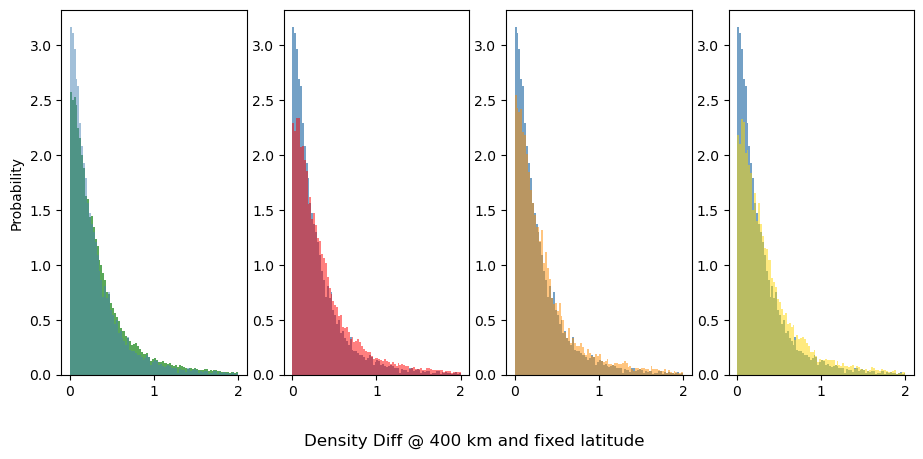

In [91]:
# define bins
h_bins = np.histogram_bin_edges(sat_df.loc[gd_t,'den_diff'],bins='fd',range=(0,2.))

density=True

fig, ax = plt.subplots(1,4, figsize=(11,5),gridspec_kw={'bottom':0.15})

ax[0].hist(sat_df.loc[gd_t,'den_diff'],bins=h_bins, alpha = 0.75, label='All', density=density, color='forestgreen')
ax[0].hist(sat_df.loc[gd_t & qt_x & qt_y,'den_diff'],bins=h_bins, alpha = 0.5, label='Quiet', density=density, color='steelblue')

ax[1].hist(sat_df.loc[gd_t & qt_x & qt_y,'den_diff'],bins=h_bins, alpha = 0.75, label='Quiet', density=density, color='steelblue')
ax[1].hist(sat_df.loc[gd_t & st_x & st_y,'den_diff'],bins=h_bins, alpha = 0.5, label='Storm', density=density, color= 'red')

ax[2].hist(sat_df.loc[gd_t & qt_x & qt_y,'den_diff'],bins=h_bins, alpha = 0.75, label='Quiet', density=density, color='steelblue')
ax[2].hist(sat_df.loc[gd_t & mn_x & mn_y,'den_diff'],bins=h_bins, alpha = 0.5, label='Main Phase', density=density, color='darkorange')

ax[3].hist(sat_df.loc[gd_t & qt_x & qt_y,'den_diff'],bins=h_bins, alpha = 0.75, label='Quiet', density=density, color='steelblue')
ax[3].hist(sat_df.loc[gd_t & rc_x & rc_y,'den_diff'],bins=h_bins, alpha = 0.5, label='Recovery Phase', density=density, color='gold')

ax[0].set_ylabel('Probability')
fig.supxlabel('Density Diff @ 400 km and fixed latitude', y=0.002)

fig.draw
